   Balance  LeftWeight  LeftDist  RightWeight  RightDist
0        B           1         1            1          1
1        R           1         1            1          2
2        R           1         1            1          3
3        R           1         1            1          4
4        R           1         1            1          5
5        R           1         1            2          1
6        R           1         1            2          2
7        R           1         1            2          3
8        R           1         1            2          4
9        R           1         1            2          5
10       R           1         1            3          1
11       R           1         1            3          2


<Axes: >

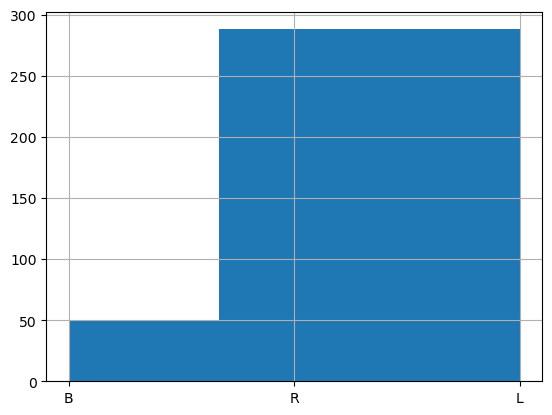

In [11]:
import pandas as pd
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection, metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import optimizers

from matplotlib import pyplot as plt
import plotly.express as px

nombre_archivo = '../Datos/Balance.csv' # archivo de hojas

df = pd.read_csv(nombre_archivo)

# Para hacer una inspección rápida de los datos
print(df.head(12))

#print(df.describe())
df['Balance'].hist(bins=3)

In [13]:
# %% separa atributos y clases
X_raw = np.array(df.iloc[:,1:])  # recupera todas las columnas salvo la primera (es la clase)
Y_raw = np.array(df.iloc[:,0])    # recupera solo la última columna (es la clase)

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
# Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

print('Las clases del dataset son :', binarizer.classes_)
print(Y_raw)

# %% Separa ejemplos para enternamiento y testeo
TEST_SIZE = 0.3 # proporcion entre testeo entre entrenamiento y testeo
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)
print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))

# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()

X_train  = scaler.fit_transform( X_train )
X_test   = scaler.transform( X_test )

Las clases del dataset son : ['B' 'L' 'R']
[[1 0 0]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [1 0 0]]

Datos de Entrenamiento: 437   Datos de Testeo: 188


# Solo cambia esta celda

In [18]:
ENTRADAS = X_train.shape[1]
SALIDAS  = Y_train.shape[1]
ocultas = 4

modelo = Sequential()
modelo.add(Input(shape=(ENTRADAS,)))
modelo.add(Dense(ocultas, activation='relu'))
modelo.add(Dense(SALIDAS, activation='softmax'))

modelo.summary()

#optimizador = optimizers.SGD(learning_rate=0.005) 
optimizador = optimizers.Adam(learning_rate=0.005) 
modelo.compile(optimizer=optimizador, loss='categorical_crossentropy', metrics = ['accuracy'])

EPOCAS = 500 #es lo que antes poníamos como max_iteraciones
TAM_LOTE = 32 #sklearn pone uno por defecto, esto es diferente respecto a la solución anterior
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
history = modelo.fit(x=X_train, y=Y_train, batch_size=TAM_LOTE, epochs=EPOCAS, callbacks=[early_stop])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35 (140.00 B)

 Trainable params: 35 (140.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3244 - loss: 1.2268
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4378 - loss: 1.0714 
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5906 - loss: 0.9446 
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7566 - loss: 0.8075 
Epoch 5/500
 1/14 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8438 - loss: 0.7001

C:\Users\Mateo\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8355 - loss: 0.7034 
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.6155 
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.5438 
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.8776 - loss: 0.4680
Epoch 9/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8903 - loss: 0.4032 
Epoch 10/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8738 - loss: 0.3945 
Epoch 11/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8904 - loss: 0.3805 
Epoch 12/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8844 - loss: 0.3631 
Epoch 13/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8921 - loss: 0.3547 
Epoch 14/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9208 - loss: 0.2899 
Epoch 15/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9052 - loss: 0.2895 
Epoch 16/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accur

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.9524 - loss: 0.1641
Epoch 73/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9663 - loss: 0.1299 
Epoch 74/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9579 - loss: 0.1472 
Epoch 75/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9651 - loss: 0.1360 
Epoch 76/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9712 - loss: 0.1566 
Epoch 77/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9525 - loss: 0.1495 
Epoch 78/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9755 - loss: 0.1431 
Epoch 79/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9686 - loss: 0.1509 
Epoch 80/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9728 - loss: 0.1258 
Epoch 81/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9600 - loss: 0.1462 
Epoch 82/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9781 - loss: 0.1335 
Epoch 83/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.1008 
Epoch 140/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9879 - loss: 0.0894 
Epoch 141/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9758 - loss: 0.0965 
Epoch 142/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9903 - loss: 0.0913 
Epoch 143/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9885 - loss: 0.0833 
Epoch 144/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9864 - loss: 0.0815 
Epoch 145/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9918 - loss: 0.0811 
Epoch 146/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9831 - loss: 0.0954 
Epoch 147/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9859 - loss: 0.0900 
Epoch 148/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9829 - loss: 0.0945 
Epoch 149/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9872 - loss: 0.0914 
Epoch 150/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0605 
Epoch 207/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9836 - loss: 0.0784 
Epoch 208/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9890 - loss: 0.0659 
Epoch 209/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9940 - loss: 0.0570 
Epoch 210/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9774 - loss: 0.0824 
Epoch 211/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0625 
Epoch 212/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9863 - loss: 0.0582 
Epoch 213/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9925 - loss: 0.0696 
Epoch 214/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9893 - loss: 0.0663 
Epoch 215/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9842 - loss: 0.0671 
Epoch 216/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9891 - loss: 0.0783 
Epoch 217/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9837 - loss: 0.0636 
Epoch 274/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9940 - loss: 0.0480 
Epoch 275/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9845 - loss: 0.0510 
Epoch 276/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0594 
Epoch 277/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9831 - loss: 0.0622 
Epoch 278/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9895 - loss: 0.0658 
Epoch 279/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9888 - loss: 0.0648 
Epoch 280/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9951 - loss: 0.0452 
Epoch 281/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9816 - loss: 0.0641 
Epoch 282/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9862 - loss: 0.0603 
Epoch 283/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9862 - loss: 0.0553 
Epoch 284/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9875 - loss: 0.0536 
Epoch 341/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9739 - loss: 0.0706 
Epoch 342/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9861 - loss: 0.0464 
Epoch 343/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9906 - loss: 0.0498 
Epoch 344/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9849 - loss: 0.0449 
Epoch 345/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9888 - loss: 0.0476 
Epoch 346/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0470 
Epoch 347/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9851 - loss: 0.0526 
Epoch 348/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9957 - loss: 0.0462 
Epoch 349/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9914 - loss: 0.0474 
Epoch 350/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9874 - loss: 0.0461 
Epoch 351/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9838 - loss: 0.0533 
Epoch 408/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9864 - loss: 0.0516 
Epoch 409/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9905 - loss: 0.0372 
Epoch 410/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0409 
Epoch 411/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9803 - loss: 0.0530 
Epoch 412/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9907 - loss: 0.0478 
Epoch 413/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9867 - loss: 0.0508 
Epoch 414/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.0411 
Epoch 415/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0416 
Epoch 416/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9898 - loss: 0.0411 
Epoch 417/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9887 - loss: 0.0423 
Epoch 418/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9931 - loss: 0.0419 
Epoch 475/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9882 - loss: 0.0402 
Epoch 476/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9944 - loss: 0.0326 
Epoch 477/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9840 - loss: 0.0429 
Epoch 478/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9859 - loss: 0.0424 
Epoch 479/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9797 - loss: 0.0509 
Epoch 480/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9976 - loss: 0.0327 
Epoch 481/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9928 - loss: 0.0356 
Epoch 482/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9910 - loss: 0.0408 
Epoch 483/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9897 - loss: 0.0462 
Epoch 484/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - loss: 0.0357 
Epoch 485/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [19]:
# calcula las metricas precision, recall, f1-score y accuracy a partir de la matriz de confusion
# retorna tupla: ( precision, recall, f1_score, accuracy )
def calcular_metricas(conf_mat):
    precision = np.zeros(conf_mat.shape[0])
    for i in range(0, len(conf_mat)):
        precision[i] = conf_mat[i][i]/sum(conf_mat.T[i])

    recall = np.zeros(conf_mat.shape[0])
    for i in range(0, len(conf_mat)):
        recall[i] = conf_mat[i][i]/sum(conf_mat[i])

    f1_score = 2* (precision*recall) /(precision+recall)

    accuracy =  0
    for i in range(0, len(conf_mat)):
        accuracy+=conf_mat[i][i]
    accuracy/= conf_mat.sum()

    return ( precision, recall, f1_score, accuracy )

# el parámetro metricas es una tupla ( precision, recall, f1_score, accuracy )
def imprimir_metricas( metricas ):
    (precision, recall, f1_score, accuracy) = metricas
    print('\n clase   precision    recall    f1-score')
    for i in range(0, len(precision)):
        print('%5d %10.2f %10.2f %10.2f' % (i, precision[i], recall[i], f1_score[i]))
    print('\naccuracy: %6.2f\n' % accuracy)

In [20]:
#  ########### Medición del entrenamiento ######################
Y_pred = modelo.predict(X_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )

report = metrics.classification_report(Y_it, Y_pred_it)
print("Reporte SkLearn:\n%s" % report)
cm = metrics.confusion_matrix(Y_it, Y_pred_it)
print("Confusion matrix:\n%s" % cm)

#calcula métricas de forma manual
mt = calcular_metricas(cm)
imprimir_metricas(mt)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Efectividad:  99.08%
Reporte SkLearn:
              precision    recall  f1-score   support

           B       0.89      1.00      0.94        32
           L       1.00      0.99      1.00       204
           R       1.00      0.99      0.99       201

    accuracy                           0.99       437
   macro avg       0.96      0.99      0.98       437
weighted avg       0.99      0.99      0.99       437

Confusion matrix:
[[ 32   0   0]
 [  2 202   0]
 [  2   0 199]]

 clase   precision    recall    f1-score
    0       0.89       1.00       0.94
    1       1.00       0.99       1.00
    2       1.00       0.99       0.99

accuracy:   0.99

